In [2]:
import numpy as np
import networkx as nx
from scipy import sparse
import itertools
import given_material.mlext as me
from given_material.plot_graph import plot_graph
from given_material.square_triangular_grid import square_triangular_grid
from given_material.reorder import *
import scipy.stats as ss

### Exercise 1

In [3]:
A = [[-2, -8, -7, 0, 0, 1],
     [1, 2, 0, -8, 0, 0],
     [-5, 0, 1, -7, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 8, -8],
     [0, 0, 0, 0, 0, 0]]

In [4]:
### a
def ex1a(mat):
    coo_mat = sparse.coo_matrix(mat)
    n, m = coo_mat.shape
    I, J, V = sparse.find(coo_mat)
    print(f" n: {n} \n m: {m} \n I: {I} \n J: {J} \n V: {V}")

ex1a(A.copy())

 n: 6 
 m: 6 
 I: [0 1 2 0 1 4 0 2 1 2 4 0 4] 
 J: [0 0 0 1 1 1 2 2 3 3 4 5 5] 
 V: [-2  1 -5 -8  2  5 -7  1 -8 -7  8  1 -8]


In [5]:
### b
def ex1b(mat):
    csc_mat = sparse.csc_matrix(mat)
    n, m = csc_mat.shape
    I, J, V = sparse.find(csc_mat)
    N = np.bincount(J)
    print(f" n: {n} \n m: {m} \n I: {I} \n N: {N} \n V: {V}")

ex1b(A.copy())

 n: 6 
 m: 6 
 I: [0 1 2 0 1 4 0 2 1 2 4 0 4] 
 N: [3 3 2 2 1 2] 
 V: [-2  1 -5 -8  2  5 -7  1 -8 -7  8  1 -8]


In [6]:
### c
def sprandi(interval, n, m, d):
    return sparse.random(n, m, density=d, data_rvs=ss.randint(interval[0], interval[1]+1).rvs)

k = 1
l = 8
n = 8
m = 10
d = 0.1

sprandi([k,l], n, m, d).todense()


matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 7.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 8., 8., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 8., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 7., 0., 7., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 8., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 4.]])

### Exercise 2

In [7]:
A = np.random.randint(*[0,2], (8,8))

In [8]:
### a
def ex2a(mat):
    mat = sparse.csc_matrix(mat)
    I, J, V = sparse.find(mat)

    mat[I,J] = 10 * I + J
    
    return mat

ex2a(A.copy()).todense()

matrix([[ 0,  0,  0,  3,  0,  0,  0,  7],
        [ 0,  0, 12, 13,  0,  0,  0,  0],
        [20, 21, 22,  0, 24, 25, 26, 27],
        [30, 31,  0,  0,  0, 35,  0, 37],
        [ 0,  0,  0, 43,  0,  0, 46,  0],
        [ 0,  0, 52, 53, 54, 55, 56, 57],
        [ 0,  0, 62, 63, 64,  0,  0, 67],
        [70,  0, 72,  0,  0, 75, 76,  0]], dtype=int64)

In [9]:
### b
def ex2b(mat):
    I, J, V = sparse.find(mat+1)
    mat[I,J] = 10 * I + J
    
    return mat

ex2b(A.copy())

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [20, 21, 22, 23, 24, 25, 26, 27],
       [30, 31, 32, 33, 34, 35, 36, 37],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [50, 51, 52, 53, 54, 55, 56, 57],
       [60, 61, 62, 63, 64, 65, 66, 67],
       [70, 71, 72, 73, 74, 75, 76, 77]])

In [10]:
def ex2c(mat):
    I, J, V = sparse.find(mat)
    mat[I[(J == 2) | (J == 6)], J[(J == 2) | (J == 6)]] = 7
    return mat

ex2c(A.copy())

array([[1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 7, 1, 0, 0, 0, 0],
       [1, 1, 7, 0, 1, 1, 7, 1],
       [1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 7, 0],
       [0, 0, 7, 1, 1, 1, 7, 1],
       [0, 0, 7, 1, 1, 0, 0, 1],
       [1, 0, 7, 0, 0, 1, 7, 0]])

### Exercise 3

In [11]:
### a
def ex3a(n, k, l):
    A = sparse.random(int(n/2), int(n/2), density= l / (n**2/4), data_rvs=ss.randint(-k, k+1).rvs)
    return sparse.kron([[0,0], [1,0]], A).todense()

n = 10
k = 6
l = 8

ex3a(n,k,l)

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  0.,  0., -3., -3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
### b
n = 5
A = np.random.randint(0,10, size=(n,n))
L = sparse.csc_matrix(sparse.tril(A, k= -1).toarray() + np.eye(n))
print(L.toarray())
D = sparse.diags(np.random.randint(0, 10, size=n), shape=(n,n))
print(D.toarray())

[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [9. 5. 1. 0. 0.]
 [5. 8. 9. 1. 0.]
 [3. 1. 9. 2. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 9. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 7.]]


In [13]:
LDLT = (L * D * L.T)
LDLT.toarray()

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   9.,  45.,  72.,   9.],
       [  0.,  45., 228., 387.,  72.],
       [  0.,  72., 387., 822., 321.],
       [  0.,   9.,  72., 321., 271.]])

### Exercise 4

In [64]:
import pygraphviz as pgv
from networkx.drawing.nx_pydot import to_pydot
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image


In [65]:
def draw(G, path=None):
    """
    Draw the graph g and return as png. The graph is plotted inline in an IPython notebook.
    When a path is given, also save the image to a file at path, using the export function.
    """
    if path is not None:
        to_agraph(G).draw(format='png', prog='dot', path=path)
    return Image(to_agraph(G).draw(format='png', prog='dot'))


In [66]:
n = 8
V = np.arange(n)
C = sparse.dok_matrix([[1, 0, 1, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 1],[1, 0, 1, 0, 0, 1, 1, 0],[1, 0, 1, 0, 1, 1, 1, 1],[1, 0, 1, 1, 1, 0, 0, 0],[0, 0, 1, 0, 0, 1, 1, 0],[1, 0, 0, 0, 1, 0, 0, 0],[0, 1, 0, 0, 0, 1, 1, 0]])
XY = np.array([[1,2,3,1,2,3,1,2],[1,1,1,2,2,2,3,3]])

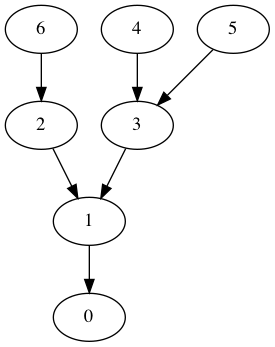

In [67]:
### a
draw(G)

In [68]:
### c
def ex4c(n, processed_list):
    U = np.arange(1,n+1)
    proc = np.array(processed_list)
    U[proc-1] = 0
    
    return U[np.nonzero(U)[0]]

n = 8
processed_list = [1,2,4,6,8]

ex4c(n, processed_list)

array([3, 5, 7])

In [78]:
### d
def degr(C, VL):
    # make entries of self-loops zero and rest of diagonal -1
    A = C - np.eye(C.shape[0])
    return np.bincount(sparse.find(A[VL] > 0)[0])

VL = [3,1,7]
degr(C, VL)

array([6, 2, 3])

In [87]:
### e
def ex4e(C):
    I, J, V = sparse.find(C.T)
    C[I,J] = I + 1
    return C

N = ex4e(C.copy())
N.toarray()

array([[1, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 2],
       [3, 0, 3, 3, 3, 3, 1, 0],
       [1, 0, 1, 0, 4, 1, 1, 1],
       [1, 5, 1, 5, 5, 0, 5, 0],
       [0, 0, 6, 6, 0, 6, 1, 6],
       [1, 0, 7, 7, 1, 7, 0, 7],
       [0, 8, 0, 8, 0, 1, 1, 0]])

In [112]:
### f
def ex4f(N):
    return sparse.csc_matrix(np.take_along_axis(N, np.argsort(N.toarray(), axis=0), axis=0).toarray())

N_sorted = ex4f(N.copy())
N_sorted.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 3, 1, 1, 1, 0],
       [1, 0, 1, 5, 1, 1, 1, 1],
       [1, 0, 3, 6, 3, 3, 1, 2],
       [1, 5, 6, 7, 4, 6, 1, 6],
       [3, 8, 7, 8, 5, 7, 5, 7]], dtype=int64)

In [113]:
### g
def ex4g(N, vertices):
    return N[:,np.array(vertices)-1]

vertices = [2,4,1]
ex4g(N_sorted.toarray(), vertices)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 3, 1],
       [0, 5, 1],
       [0, 6, 1],
       [5, 7, 1],
       [8, 8, 3]], dtype=int64)

In [118]:
def ex4h(N):
    _, _, V = sparse.find(N)
    unique_indcs = np.unique(V, return_index=True)
    return V[sorted(unique_indcs[1])]

vertices = [2,4,1]
N_ = ex4g(N_sorted.toarray(), vertices)#.toarray()
ex4h(N_)

array([1, 3, 5, 6, 7, 8], dtype=int64)

In [98]:
import networkx.linalg.graphmatrix as gm

def ex4i(n, d):
    return sparse.random(8, 8, 0.2, data_rvs=np.ones).toarray()

ex4i(8,0.1)

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

In [99]:
n = 8
gm.incidence_matrix(nx.gn_graph(n), nodelist=np.arange(n), oriented=True).toarray()

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.]])

In [100]:
def ex4j(C, vertices):
    print(C.toarray())
    N = ex4e(C.copy())
    
    N_ = ex4g(N.copy(), vertices)
    
    return ex4h(N_.copy().toarray())

vertices = [2,4,1]
ex4j(C.copy(), vertices)

[[1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1]
 [1 0 1 0 0 1 1 0]
 [1 0 1 0 1 1 1 1]
 [1 0 1 1 1 0 0 0]
 [0 0 1 0 0 1 1 0]
 [1 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 1 0]]


array([1, 3, 5, 6, 7, 8])

### Exercise 5

In [29]:
from network2tikz import plot

In [30]:
n = 11
G = nx.gn_graph(n)
XYZ = np.array(list(itertools.product(range(np.ceil(np.sqrt(n)).astype(int)), repeat=2)))
np.random.shuffle(XYZ)
IJV = G.edges()
nb_dimension = 2
nb_points = n
C = nx.to_scipy_sparse_matrix(G)

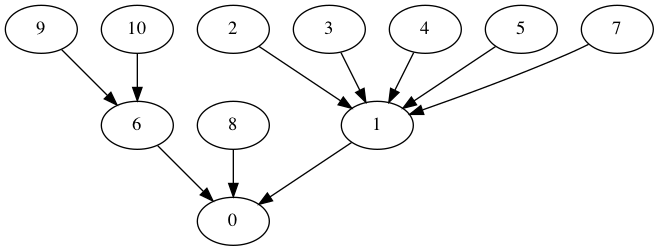

In [31]:
draw(G)

In [34]:
### b
def ex5b(v_coord, arc_list):
    G = nx.DiGraph()
#     G.add_nodes_from(v_coord)
    G.add_edges_from(arc_list)
    return gm.incidence_matrix(G,oriented=True).toarray()
    
nodes_pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1)}    
arc_list = [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (1, 3), (2, 2), (2, 3)]
# sparse.coo_matrix(([1] * len(arc_list), zip(*arc_list)), shape=(len(nodes_pos), len(nodes_pos))).toarray()

B = ex5b(nodes_pos, arc_list)
abs(B)

array([[0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1.]])

In [35]:
###  c
def ex5c(C):
    C.setdiag(0)
    return abs(C)

### still an undirected connectivity matrix (change after solving 5b)
A = sparse.random(8, 8, 0.2, data_rvs=np.ones)

ex5c(A.copy()).toarray()


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0.]])

[[ 1.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  1.]
 [ 0.  0. -1.  1.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]]


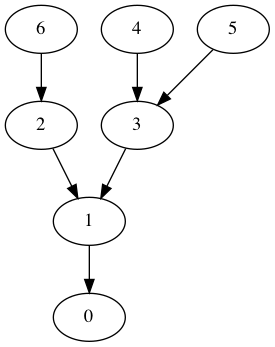

In [36]:
### d
def ex5d(G):
    return gm.incidence_matrix(G, oriented=True)

n = 7
G = nx.gn_graph(n)

print(ex5d(G).toarray())
draw(G)


### Exercise 6

XYZ: [[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]
IJV: [[ 2  7  3]
 [ 7  2  6]
 [ 5  2  1]
 [ 2  5  6]
 [ 5  1  0]
 [ 4  5  0]
 [ 9  8 13]
 [13  8 12]
 [ 8  5  4]
 [ 8  9  5]
 [ 5 10  6]
 [ 9 10  5]
 [ 7 10 11]
 [10  7  6]
 [10  9 13]
 [14 10 13]
 [11 10 15]
 [10 14 15]]
nb_dimension: 2
nb_points: 16
nb_cells: 18


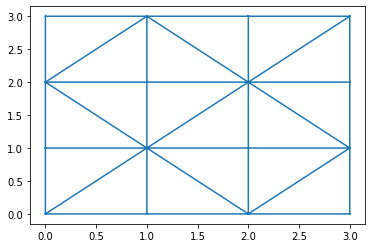

In [37]:
### a
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

n = 10
XYZ = np.array(list(itertools.product(range(np.ceil(np.sqrt(n)).astype(int)), repeat=2)))
IJV = Delaunay(XYZ).simplices
plt.triplot(XYZ[:,0], XYZ[:,1], triangles=IJV)

nb_dimension = np.size(XYZ, 1)
nb_points = len(XYZ)
nb_cells = len(IJV)

print(f"XYZ: {XYZ}")
print(f"IJV: {IJV}")
print(f"nb_dimension: {nb_dimension}")
print(f"nb_points: {nb_points}")
print(f"nb_cells: {nb_cells}")


In [38]:
### b

In [52]:
### c

In [51]:
coord = list(itertools.chain.from_iterable([list(itertools.combinations(x, r=2)) for x in IJV]))

A = sparse.coo_matrix(coord).toarray()
C = sparse.coo_matrix(([1] * len(A), (A[:,0], A[:,1])))
C.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]])

### Exercise 7

In [41]:
grids_path = "../../2mmn20_1/gallery/grids/"

In [122]:
# read and make cell list KLW (matrix: nb_cells x 4 vertices)
KLW = np.fromfile(grids_path + "GD1points.txt",dtype=int,sep=' ')
KLW = KLW.reshape((int(np.size(KLW)/4),4))
print(KLW)
# read and make XYZ coordinates (matrix: nb_vertices x 3 coordinates)
XYZ = np.fromfile(grids_path + "GD1XYZ.txt",dtype=float,sep=' ')
XYZ = XYZ.reshape((int(np.size(XYZ)/3),3))
print(XYZ)

[[  1   2   4   8]
 [  1   3   4   8]
 [  1   3   7   8]
 ...
 [155 648 646 645]
 [250 648 647 645]
 [155 648 647 645]]
[[0.     0.     0.    ]
 [1.     0.     0.    ]
 [0.     1.     0.    ]
 ...
 [0.4375 0.1875 0.375 ]
 [0.4375 0.25   0.3125]
 [0.4375 0.25   0.375 ]]


In [43]:
IJVW = np.array([[1,2,3.0],[2,2,-1.0],[3,2,0.1],[4,2,1/3]]);
IJVW.tofile("IJV.txt",sep=" ",format="%s");
# well, tofile() does not save dimensions ....
IJVR = np.fromfile("IJV.txt",dtype=float,sep=' ')
IJVR = IJVR.reshape((4,3))
print(np.linalg.norm(IJVW-IJVR,2))

0.0


In [124]:
IJVW  =   np.array([[1,2,3.0],[2,2,-1.0],[3,2,0.1],[4,2,1/3]]);
IJVW2 = 2*np.array([[1,2,3.0],[2,2,-1.0],[3,2,0.1],[4,2,1/3]]);
# only the first matrix is saved ...
np.save("IJV.npy", IJVW, IJVW2)
IJVR = np.load("IJV.npy")
print(np.linalg.norm(IJVW-IJVR,2))


0.0


Text(0.5, 1.0, 'GD1')

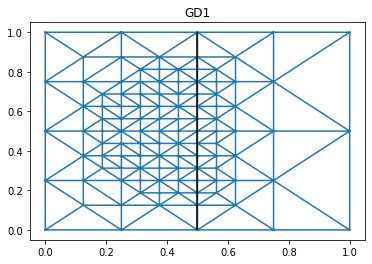

In [144]:
plt.triplot(XYZ[:,0], XYZ[:,1], triangles=KLW)
plt.vlines(1/2, 0, 1)
plt.title('GD1')

In [140]:
import trimesh

mesh = trimesh.Trimesh(vertices=XYZ, faces=KLW)
mesh.show()

IndexError: index 648 is out of bounds for axis 0 with size 648

In [141]:
KLW.shape

(6698, 4)

In [142]:
XYZ.shape

(648, 3)

### Exercise 9

In [44]:
C = rcm(20,80); print('C:'); print(C.todense())
V = np.array([0],dtype=int);
P = bfs_levelset(C,V); print('Found permutation:'); print(P+1)

C:
[[1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1]
 [0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0]]
Found permutation:
[ 1  2  5  9 13 16 20  4 10 11 17 18  7  8 19  3 12  6 14]


In [45]:
P = bfs_levelset_greedy(C,V); print('Found permutation:'); print(P+1)

N:
[ 0  1  4  8 12 15 19]
N:
[ 0  1  2  3  4  6  7  8  9 10 11 12 15 16 17 18 19]
N:
[ 0  1  2  3  4  5  6  9 10 11 13 15 16 18 19]
N:
[ 3  5  6  9 13 15 17]
Found permutation:
[ 1  2  5  9 13 16 20  3  4  7  8 10 11 12 17 18 19  6 14]


### Exercise 9

In [48]:
### no file named ST4_IJV or ST5_IJV

X = np.fromfile('../../2mmn20_1/gallery/stokes/ST4_IJV.txt',dtype=float,sep=' ')
X = X.reshape((int(np.size(X,0)/3),3))
X = sparse.csc_matrix((X[:,2], (np.array(X[:,0],dtype=int), np.array(X[:,1],dtype=int))))
print(X)

FileNotFoundError: [Errno 2] No such file or directory: '../../2mmn20_1/gallery/stokes/ST4_IJV.txt'